In [2]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime
import pytz

localtz = pytz.timezone('US/Eastern')

sns.set(style='white', palette='Set2')

as_breaktime = datetime.datetime(2016,5,23,21,40)

df = pd.read_pickle('full_mlarray.pkl')
df.index = df.index.tz_convert('US/Eastern')

print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'scaled_arduino_ws'
 'avg_30_scaled_arduino_ws' 'avg_30_ws' 'hour_of_day' 'day_of_year'
 'morning' 'afternoon' 'evening' 'morning_rush' 'lunch' 'evening_rush'
 'day' 'night' 'as_temperature' 'avg

In [3]:
#add EPA values for no2

def dateparse (timestamp):    
    return parser.parse(timestamp)

epa_no_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/042516/no042516.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','no','no2'])
epa2_no_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/052316/no052316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','no','no2'])
epa3_no_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/061316arduino/no061316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','no','no2'])

#strip whitespace from headings
epa_no_min.rename(columns=lambda x: x.strip(), inplace=True)
epa2_no_min.rename(columns=lambda x: x.strip(), inplace=True)
epa3_no_min.rename(columns=lambda x: x.strip(), inplace=True)

epa_no = pd.concat([epa_no_min, epa2_no_min, epa3_no_min])
epa_no.index = epa_no.index.tz_localize('US/Eastern')

print len(df)
print len(epa_no)

df = pd.concat([df, epa_no], axis=1, join_axes=[df.index])
df.head()

85739
85739


,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,min_since_plugged_in,...,avg_1440_lmse_calib_as_co,lmse_sck_co,as_co_compare_accurate_7p5_percent,avg_15_as_co_compare_accurate_7p5_percent,sck_co_compare_accurate_7p5_percent,as_co_compare_accurate_5_percent,avg_15_as_co_compare_accurate_5_percent,sck_co_compare_accurate_5_percent,no,no2
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-15 06:13:00-04:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,0,...,NaN,192.611218,0,0,1,0,0,1,7.0,23.0
2016-04-15 06:14:00-04:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1,...,NaN,188.537828,0,0,1,0,0,1,7.0,23.0
2016-04-15 06:15:00-04:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,2,...,NaN,161.129962,0,0,1,0,0,1,7.0,23.0
2016-04-15 06:16:00-04:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,3,...,NaN,202.992017,0,0,1,0,0,1,7.0,23.0
2016-04-15 06:17:00-04:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,4,...,NaN,167.839465,0,0,1,0,0,1,7.0,22.0


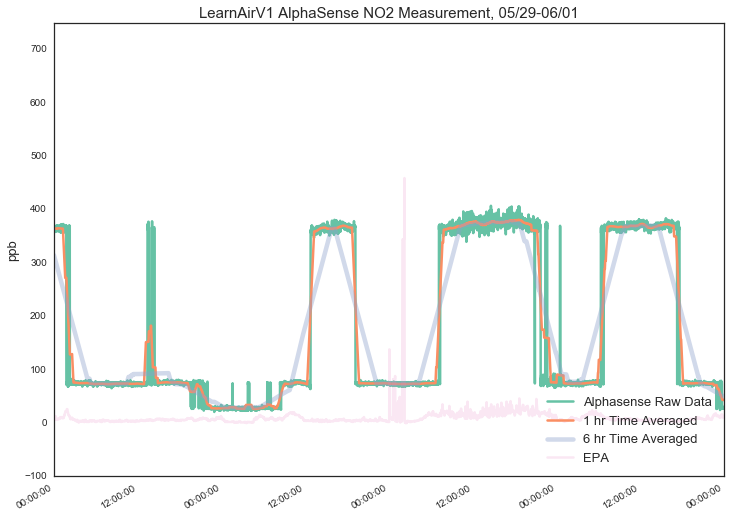

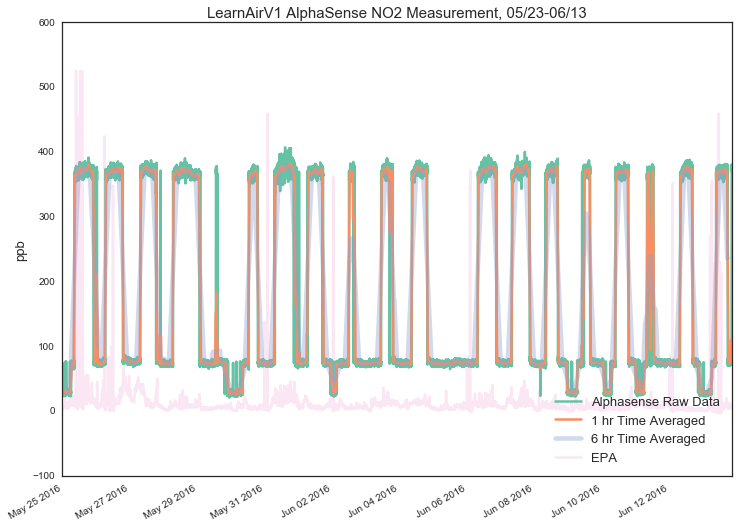

In [4]:
#no2 values - 
#    alphasense 'as_no2' 
#    smartcitizen 'Nitrogen Dioxide ( kOhm)'
#    epa 'no2'

#need to calibrate alphasense, smartcitizen, then generate 10% accuracy plots


#1: JUSTIFY/ADD IN 15 MIN ROLLING AVERAGE FOR ALPHASENSE DATA


starttime = datetime.datetime(2016,5,29)
endtime = datetime.datetime(2016,6,2)

value1 = 'as_no2'
value2 = 'avg_60_as_no2'
value3 = 'avg_360_as_no2'
value4 = 'no2'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=4.5, alpha=.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values, lw=2.5, alpha=.2)

plt.legend(['Alphasense Raw Data', '1 hr Time Averaged','6 hr Time Averaged', 'EPA'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense NO2 Measurement, 05/29-06/01', fontsize=15)
plt.ylim(-100,750)
plt.savefig('./figs/as_no2_raw_zoomed.png', bbox_inches='tight', dpi=200)


starttime = datetime.datetime(2016,5,25)
endtime = datetime.datetime(2016,6,23)




value1 = 'as_no2'
value2 = 'avg_60_as_no2'
value3 = 'avg_360_as_no2'
value4 = 'no2'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=4.5, alpha=.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values, lw=2.5, alpha=.2)

plt.legend(['Alphasense Raw Data', '1 hr Time Averaged','6 hr Time Averaged', 'EPA'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense NO2 Measurement, 05/23-06/13', fontsize=15)

plt.savefig('./figs/as_no2_raw.png', bbox_inches='tight', dpi=200)

#we can see serious quantization issues here with the trace CO.  We will do a typical learning style on the averaged
#data, but to give the alphasense sensor a fair shake (not dependent on dynamic range/ADC error from 10 bit arduino)
#we'll also call things 'right' if they are in the correct bin.  Looking at this plot, we can see quantization at 
#100 and 400 ppb.  Assuming this gap of 300, we'll call it 'accurate' if it's within 150 ppb of the actual value
#(the quantization level) for the raw signal, and see what we get.

COBYLA minimization= [ 258.79274637  271.28715372 -103.20047783]

TNC minimization= [ 259.2093883   268.79032965 -113.56912942]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 666815727.086
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
SLSQP minimization= [ 257.63305259  270.36596824 -102.35211711]

original rmse = 219.836689713
after optimization rmse = 148.716535273


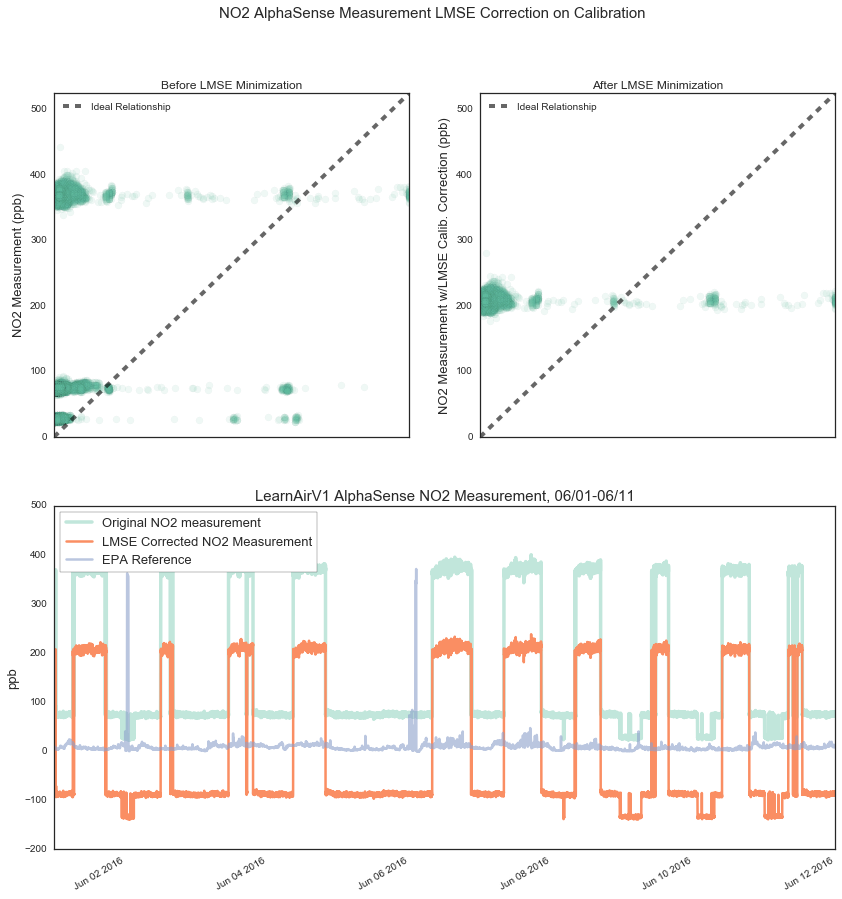

In [9]:
#3 LMSE ALPHASENSE CO SET #2 CALIBRATION STYLE (Minimize the calibration electrode values) 
#RMS fit - scale factor and offset



#4 LMSE ALPHASENSE SET #2 CALIBRATION

'''
we_zero = 266.0 #mV
ae_zero = 262.0 #mV
sensitivity = -0.281 #mV/ppb
n_temps = [15, 25] #degrees C that seperate n regimes
n= [1.09, 1.35, 3.0] #n values that correspond to n_temps [<n_temps[0], between n_temps[0],n_temps[1], >n_temps[1]]

def compute_no2_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    elif temp < n_temps[1]:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[2]*ae - ae_zero)) / sensitivity

df.loc[as_breaktime:, 'as_no2'] = [compute_no2_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity) \
                    for we, ae, temp in zip(df.ix[as_breaktime:]['alphaS3_work'], df.ix[as_breaktime:]['alphaS3_aux'], df.ix[as_breaktime:]['avg_15_as_temperature'])]

'''

MINIMIZE_SENSITIVITY = False #can just minimize electrode offsets- this includes sensitivity in minimization if true

sensitivity = -0.281 #mV/ppb
n_temps = [15, 25] #degrees C that seperate n regimes
n= [1.09, 1.35, 3.0] #n values that correspond to n_temps [<n_temps[0], between n_temps[0],n_temps[1], >n_temps[1]]

def compute_no2_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    elif temp < n_temps[1]:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[2]*ae - ae_zero)) / sensitivity

ref_col = 'no2'
new_col = 'lmse_calib_as_no2'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, 'as_no2'].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )

def minimize_me(x):
    if MINIMIZE_SENSITIVITY:
        return np.nansum(([compute_no2_val(n_temps, n, temp, we, x[0], ae, x[1], x[2]) + x[3] for we, ae, temp in \
                     zip(df.loc[as_breaktime:,'alphaS3_work'], df.loc[as_breaktime:,'alphaS3_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]- df.loc[as_breaktime:, ref_col].values)**2)
    else:
        return np.nansum(([compute_no2_val(n_temps, n, temp, we, x[0], ae, x[1], sensitivity) + x[2] for we, ae, temp in \
                     zip(df.loc[as_breaktime:,'alphaS3_work'], df.loc[as_breaktime:,'alphaS3_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]- df.loc[as_breaktime:, ref_col].values)**2)

if MINIMIZE_SENSITIVITY:
    x0 = np.array([266.,262.,-0.281,0.])
    bnds = ((100, 400), (100, 400), (-0.4,0.1), (-400,400))
else:
    x0 = np.array([266.,262.,-100.])
    bnds = ((100, 400), (100, 400), (-400,400))


res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

if MINIMIZE_SENSITIVITY:
    df.loc[as_breaktime:, new_col] = [compute_no2_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], res.x[2]) + res.x[3] \
                    for we, ae, temp in zip(df.loc[as_breaktime:,'alphaS3_work'], df.loc[as_breaktime:,'alphaS3_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]
else:
    df.loc[as_breaktime:, new_col] = [compute_no2_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], sensitivity) + res.x[2] \
                    for we, ae, temp in zip(df.loc[as_breaktime:,'alphaS3_work'], df.loc[as_breaktime:,'alphaS3_aux'], df.loc[as_breaktime:,'avg_15_as_temperature'])]


    
    
    
    
xmin=0
xmax=df.loc[as_breaktime:, ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_no2', data=df.ix[as_breaktime:], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[as_breaktime:], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement w/LMSE Calib. Correction (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('NO2 AlphaSense Measurement LMSE Correction on Calibration', fontsize=15)


total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, 'as_no2'].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, new_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'after optimization rmse = %s' % total_rmse



starttime = datetime.datetime(2016,6,1)
endtime = datetime.datetime(2016,6,12)

value1 = 'as_no2'
value2 = 'lmse_calib_as_no2'
value3 = 'no2'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=3.5, alpha=0.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.6)
    
plt.legend(['Original NO2 measurement', 'LMSE Corrected NO2 Measurement', 'EPA Reference'], fontsize=13, loc=2, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense NO2 Measurement, 06/01-06/11', fontsize=15)


df.drop('lmse_calib_as_no2', axis=1, inplace=True)

COBYLA minimization= [ 0.05774857 -0.28707379]

TNC minimization= [  0.2        -21.10911737]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1457094329.84
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 219.836689713
after optimization rmse = 40.3566947605
COBYLA minimization= [ 0.0583696  -0.27999583]

TNC minimization= [  0.2        -21.10252015]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1439755452.05
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 1.  0.]

original rmse = 219.836689713
after optimization rmse = 40.3307857444


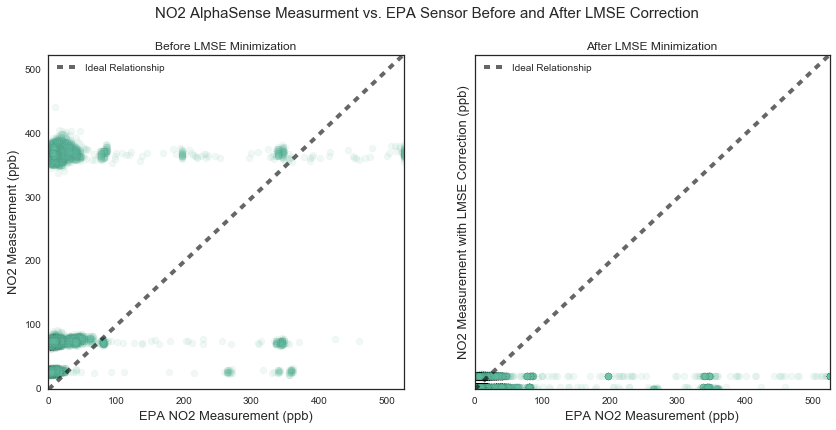

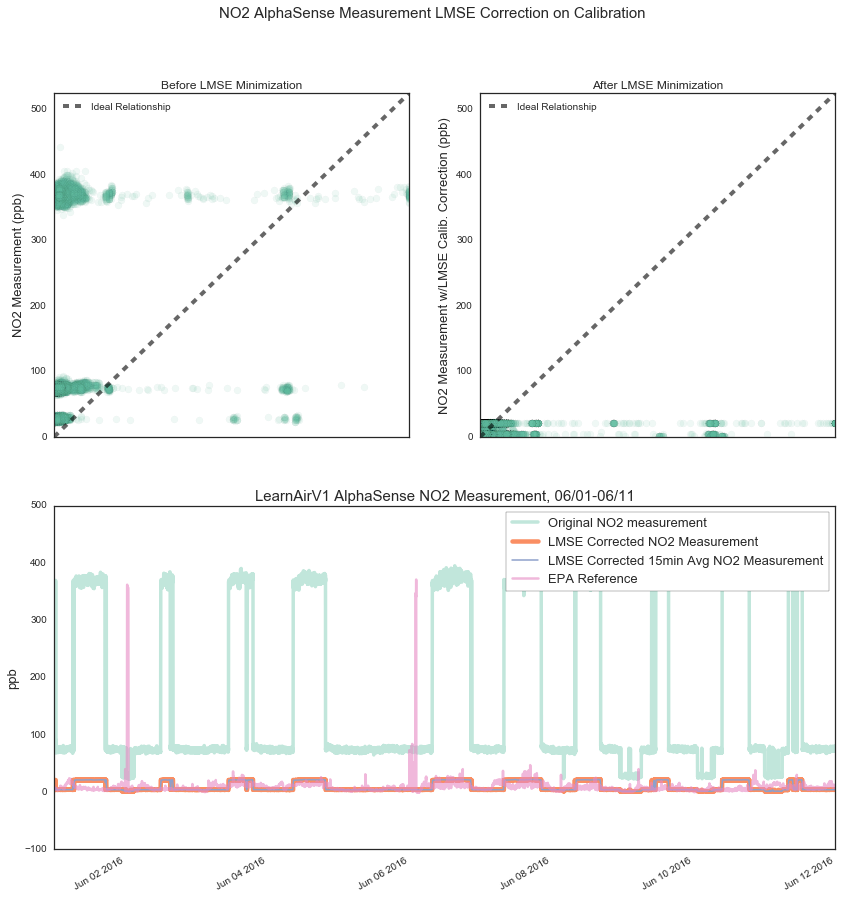

In [14]:
#LMSE ALPHASENSE NO2 DATA RAW 
#RMS fit - scale factor and offset
#NOT USEFUL - drop columns

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'no2'
scaled_col = 'as_no2'
new_col = 'lmse_as_no2'

bnds = ((0.2, 2), (-400, 400))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, scaled_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[as_breaktime:, scaled_col].values + x[1]) - df.loc[as_breaktime:, ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[as_breaktime:, new_col] = df.loc[as_breaktime:, scaled_col]*res.x[0]+res.x[1]





xmin=0
xmax=df.loc[as_breaktime:, ref_col].max()

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
plt.sca(ax1)
sns.regplot(ref_col, scaled_col, data=df.ix[as_breaktime:], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')


total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, scaled_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'original rmse = %s' % total_rmse

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[as_breaktime:], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement with LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('NO2 AlphaSense Measurment vs. EPA Sensor Before and After LMSE Correction', y=1.01, fontsize=15)

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, new_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'after optimization rmse = %s' % total_rmse





ref_col = 'no2'
scaled_col = 'avg_15_as_no2'
new_col = 'lmse_avg_15_as_no2'

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, scaled_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )

def minimize_me(x):
    return np.nansum(((x[0]*df.loc[as_breaktime:, scaled_col].values + x[1]) - df.loc[as_breaktime:, ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df.loc[as_breaktime:, new_col] = df.loc[as_breaktime:, scaled_col]*res.x[0]+res.x[1]




   
xmin=0
xmax=df.loc[as_breaktime:, ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_no2', data=df.ix[as_breaktime:], ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df.ix[as_breaktime:], ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement w/LMSE Calib. Correction (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('NO2 AlphaSense Measurement LMSE Correction on Calibration', fontsize=15)


total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, 'as_no2'].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df.loc[as_breaktime:, new_col].values - df.loc[as_breaktime:, ref_col].values)**2) / len(df.ix[as_breaktime:]) )
print 'after optimization rmse = %s' % total_rmse



starttime = datetime.datetime(2016,6,1)
endtime = datetime.datetime(2016,6,12)

value1 = 'as_no2'
value2 = 'lmse_as_no2'
value3 = 'lmse_avg_15_as_no2'
value4 = 'no2'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=3.5, alpha=0.4)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=4.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=1.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value4].values, lw=2.5, alpha=0.6)
    
plt.legend(['Original NO2 measurement', 'LMSE Corrected NO2 Measurement', 'LMSE Corrected 15min Avg NO2 Measurement', 'EPA Reference'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 AlphaSense NO2 Measurement, 06/01-06/11', fontsize=15)


plt.savefig('./figs/as_no2_lmse.png', bbox_inches='tight', dpi=200)


In [18]:
#redo calibration and everything for O3+NO2 now that we've scaled the NO2 to appropriate levels, using 'lmse_as_no2'

#alphasensor #1 = O3 + NO2
we_zero = 311.0 #mV
ae_zero = 318.0 #mV
sensitivity = 0.308 #mV/ppb
x_sensitivity_to_no2 = 0.289 #mV/ppb
n_temps = [5] #degrees C that seperate n regimes
n = [0.75, 1.28] #n values that correspond to n_temps [<n_temps[0], >n_temps[0]]

def compute_o3_no2_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity, x_sensitivity_to_no2, no2):
    if temp < n_temps[0]:
        return ( (we - we_zero) - (n[0]*ae - ae_zero) - (no2/x_sensitivity_to_no2) ) / sensitivity
    else:
        return ( (we - we_zero) - (n[1]*ae - ae_zero) - (no2/x_sensitivity_to_no2) ) / sensitivity


df.loc[as_breaktime:, 'as_o3'] = [compute_o3_no2_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity, x_sensitivity_to_no2, no2) \
                    for we, ae, temp, no2 in zip(df.ix[as_breaktime:]['alphaS1_work'], df.ix[as_breaktime:]['alphaS1_aux'], 
                                                 df.ix[as_breaktime:]['avg_15_as_temperature'], df.ix[as_breaktime:]['lmse_as_no2'])]

#redo as_o3 averaging

num_avg = 10

ref_col = 'as_o3'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df.loc[as_breaktime:, avg_col] = df.loc[as_breaktime:, ref_col].rolling(window=num_avg, center=True).mean()
df.loc[:as_breaktime, avg_col] = df.loc[:as_breaktime, ref_col].rolling(window=num_avg, center=True).mean()


#average lmse_as_no2

averages = [15, 60, 60*6]

for num_avg in averages:

    ref_col = 'lmse_as_no2'
    avg_col= 'avg_' + str(num_avg) + '_' + ref_col
    df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


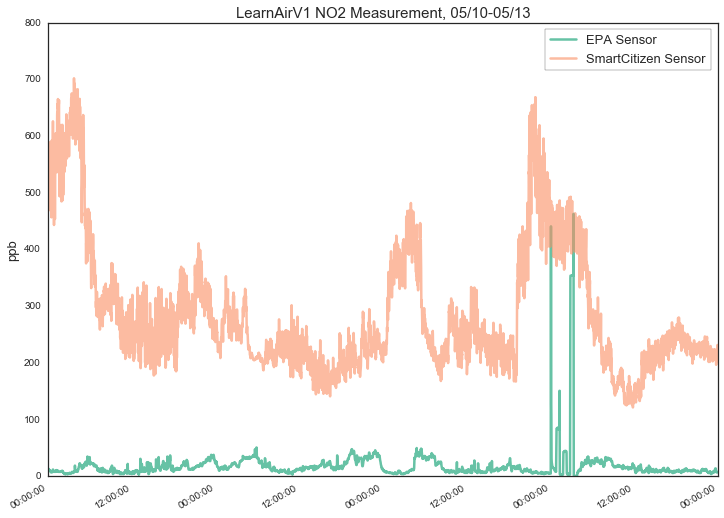

In [19]:
#2: PLOT OF RAW DATA

starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

value1 = 'no2'
value2 = 'Nitrogen Dioxide ( kOhm)'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.6)
   
plt.legend(['EPA Sensor', 'SmartCitizen Sensor'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 NO2 Measurement, 05/10-05/13', fontsize=15)

plt.savefig('./figs/no2_sck_zoomed.png', bbox_inches='tight', dpi=200)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [   8.50031784  199.31497      -5.18344929]

TNC minimization= [   2.         -475.93873848    0.        ]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 4.56225990074e+12
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
SLSQP minimization= [  10.  200.    1.]

original rmse = 241.872000614
after optimization rmse = 37.718525842


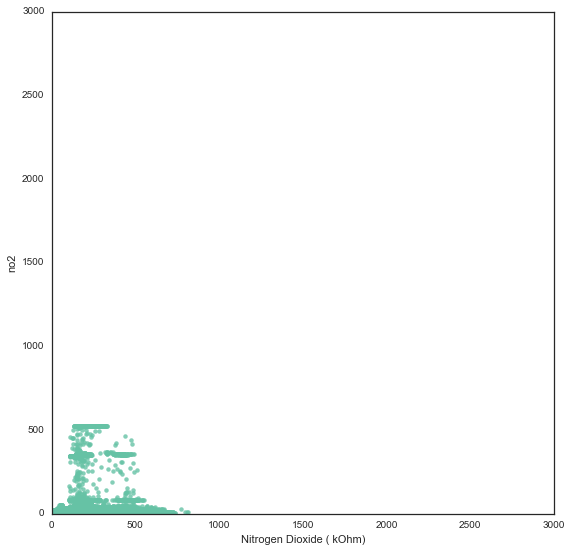

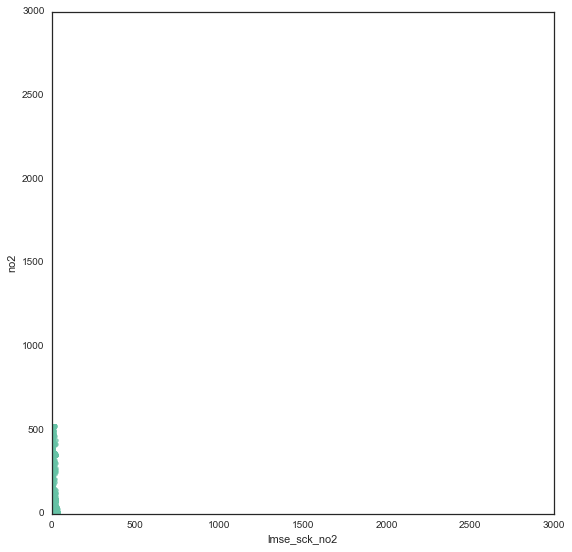

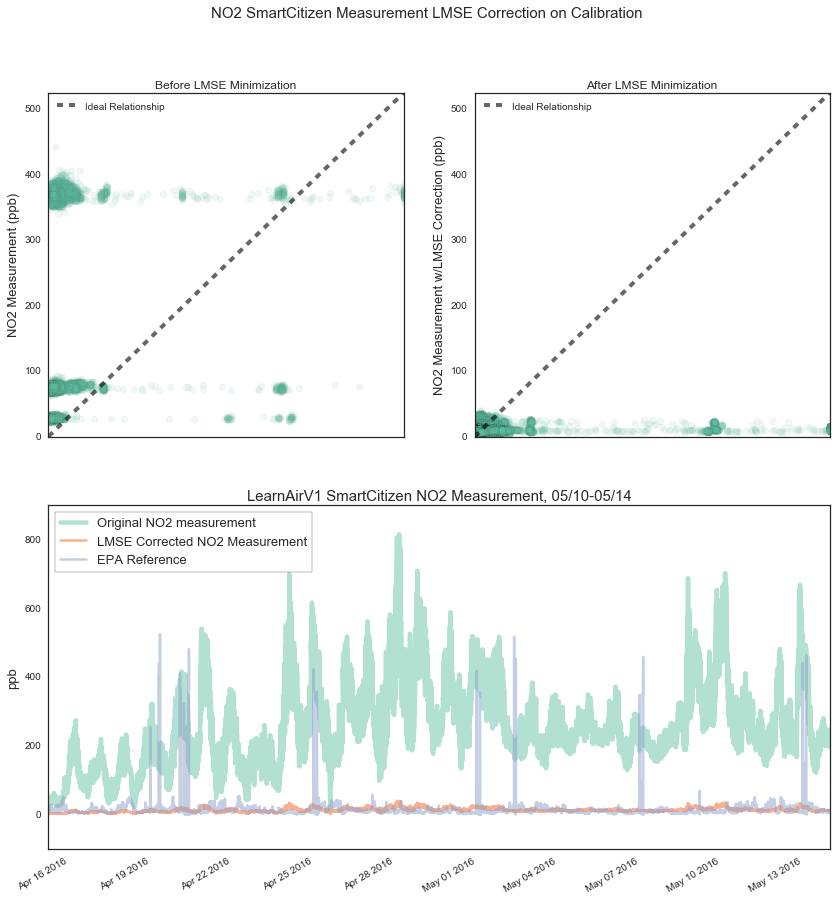

In [20]:
#8 LMSE RE-CAL SMARTCITIZEN DATA 

#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'no2'
scaled_col = 'Nitrogen Dioxide ( kOhm)'
new_col = 'lmse_sck_no2'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(( (math.e**x[2])*(x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([10.,200.,1.])
bnds = ((2, 20), (-1000, 1000), (0,10))

res2 = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res2.x)

res = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = (math.e**res2.x[2])*(df[scaled_col]*res2.x[0]+res2.x[1])


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,3000)
plt.xlim(0,3000)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse



   
xmin=0
xmax=df[ref_col].max()

#fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,6))
fig = plt.figure(figsize=(14,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

plt.sca(ax1)
sns.regplot(ref_col, 'as_no2', data=df, ax=ax1, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('Before LMSE Minimization')

plt.sca(ax2)
sns.regplot(ref_col, new_col, data=df, ax=ax2, fit_reg=False, scatter_kws={'linewidths':.1,'edgecolor':'k',"alpha":0.1,"s":50}, line_kws={"alpha":.8, "lw":4, 'c':'k'})
plt.plot([xmin,xmax],[xmin,xmax], ls='dashed', lw=4, color='k', alpha=.6)
plt.ylim(xmin,xmax)
plt.xlim(xmin,xmax)
plt.legend(['Ideal Relationship'], loc=2)
plt.ylabel('NO2 Measurement w/LMSE Correction (ppb)', fontsize=13)
plt.xlabel('EPA NO2 Measurement (ppb)', fontsize=13)
plt.title('After LMSE Minimization')

fig.suptitle('NO2 SmartCitizen Measurement LMSE Correction on Calibration', fontsize=15)



starttime = datetime.datetime(2016,4,15)
endtime = datetime.datetime(2016,5,14)

value1 = 'Nitrogen Dioxide ( kOhm)'
value2 = 'lmse_sck_no2'
value3 = 'no2'

#fig = plt.figure(figsize=(12, 9))  
#ax = plt.subplot(111)  
plt.sca(ax3)
fig.autofmt_xdate()
ax3.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=4.5, alpha=.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5, alpha=0.7)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5, alpha=0.5)
    
plt.legend(['Original NO2 measurement', 'LMSE Corrected NO2 Measurement', 'EPA Reference'], fontsize=13, loc=2, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 SmartCitizen NO2 Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/sck_no2_lmse.png', bbox_inches='tight', dpi=200)


In [36]:
'''
'lmse_as_no2'
'avg_15_lmse_as_no2'
'avg_60_lmse_as_no2'
'avg_360_lmse_as_no2'

'lmse_sck_no2'
'''

# CREATE 10% ACCURACY COLUMN FOR ALPHASENSE NO2

#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_as_no2'
ref_col = 'no2'
accurate_col = 'as_no2_compare_accurate_10_percent'

tolerance = 0.1  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_15_lmse_as_no2'
ref_col = 'no2'
accurate_col = 'avg_15_as_no2_compare_accurate_10_percent'

tolerance = 0.1  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_360_lmse_as_no2'
ref_col = 'no2'
accurate_col = 'avg_360_as_no2_compare_accurate_10_percent'

tolerance = 0.1  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_sck_no2'
ref_col = 'no2'
accurate_col = 'sck_no2_compare_accurate_10_percent'

tolerance = 0.1  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))


--
lmse_as_no2 vs no2 with 0.1 tolerance
maxval= 525.0
actual tolerance value, +-, is 26.25
correct readings= 28918
incorrect readings = 1232
correct reading percentage= 0.959137645108
--
avg_15_lmse_as_no2 vs no2 with 0.1 tolerance
maxval= 525.0
actual tolerance value, +-, is 26.25
correct readings= 28915
incorrect readings = 1235
correct reading percentage= 0.95903814262
--
avg_360_lmse_as_no2 vs no2 with 0.1 tolerance
maxval= 525.0
actual tolerance value, +-, is 26.25
correct readings= 28615
incorrect readings = 1535
correct reading percentage= 0.949087893864
--
lmse_sck_no2 vs no2 with 0.1 tolerance
maxval= 525.0
actual tolerance value, +-, is 26.25
correct readings= 72114
incorrect readings = 13625
correct reading percentage= 0.841087486441


In [40]:
# CREATE 4% ACCURACY COLUMN FOR ALPHASENSE NO2

#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_as_no2'
ref_col = 'no2'
accurate_col = 'as_no2_compare_accurate_4_percent'

tolerance = 0.04  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_15_lmse_as_no2'
ref_col = 'no2'
accurate_col = 'avg_15_as_no2_compare_accurate_4_percent'

tolerance = 0.04  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'avg_360_lmse_as_no2'
ref_col = 'no2'
accurate_col = 'avg_360_as_no2_compare_accurate_4_percent'

tolerance = 0.04  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df.ix[as_breaktime:]) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df.ix[as_breaktime:])))


#highlight sections of plot where calibrated values are worse than percent_tol% of total range off from epa vals
main_col = 'lmse_sck_no2'
ref_col = 'no2'
accurate_col = 'sck_no2_compare_accurate_4_percent'

tolerance = 0.04  
abs_tol = (tolerance * df[ref_col].max()) / 2.0

df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]

print '--'
print main_col + ' vs ' + ref_col + ' with ' + str(tolerance) + ' tolerance'
print 'maxval= ' + str(df[ref_col].max())
print 'actual tolerance value, +-, is ' + str(abs_tol)
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())
print 'correct reading percentage= %s' % (df[accurate_col].sum()/float(len(df)))

--
lmse_as_no2 vs no2 with 0.04 tolerance
maxval= 525.0
actual tolerance value, +-, is 10.5
correct readings= 20778
incorrect readings = 9372
correct reading percentage= 0.689154228856
--
avg_15_lmse_as_no2 vs no2 with 0.04 tolerance
maxval= 525.0
actual tolerance value, +-, is 10.5
correct readings= 20970
incorrect readings = 9180
correct reading percentage= 0.69552238806
--
avg_360_lmse_as_no2 vs no2 with 0.04 tolerance
maxval= 525.0
actual tolerance value, +-, is 10.5
correct readings= 22827
incorrect readings = 7323
correct reading percentage= 0.757114427861
--
lmse_sck_no2 vs no2 with 0.04 tolerance
maxval= 525.0
actual tolerance value, +-, is 10.5
correct readings= 53688
incorrect readings = 32051
correct reading percentage= 0.626179451591


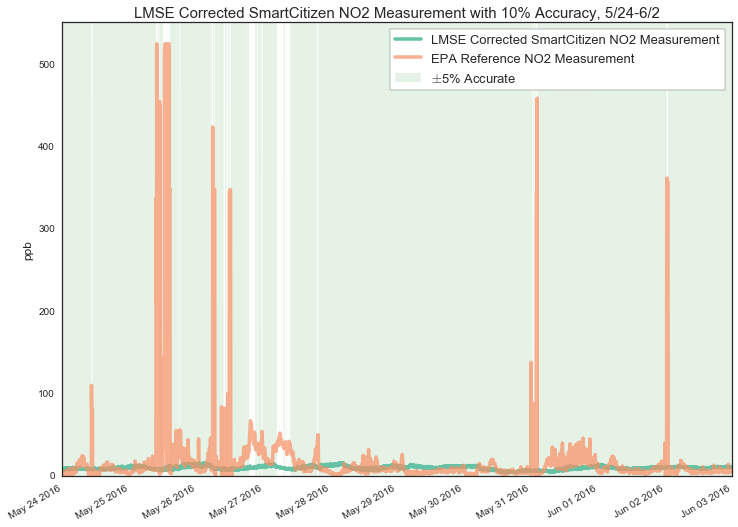

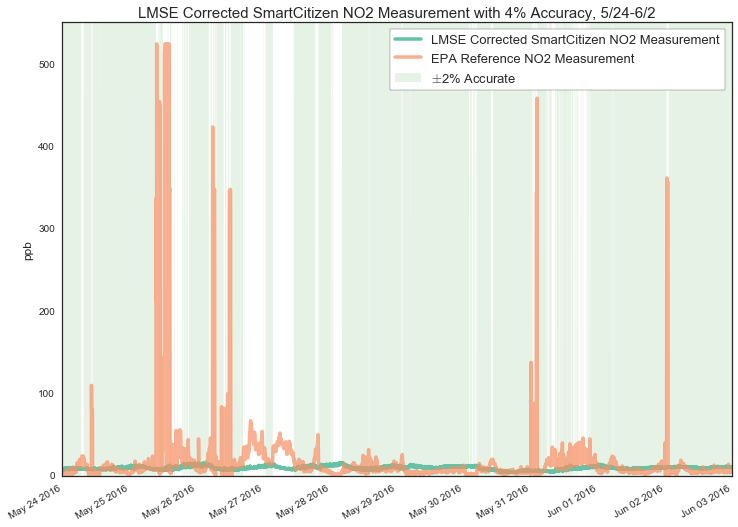

In [42]:
starttime = datetime.datetime(2016,5,24)
endtime = datetime.datetime(2016,6,3)

val1 = 'lmse_sck_no2'
val2 = 'no2'
accurate_col = 'sck_no2_compare_accurate_10_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', lw=0, alpha=0.1)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen NO2 Measurement','EPA Reference NO2 Measurement', '$\pm$5% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen NO2 Measurement with 10% Accuracy, 5/24-6/2', fontsize=15)
plt.savefig('./figs/sck_no2_with_10_accuracy_zoomed.png', bbox_inches='tight', dpi=200)


val1 = 'lmse_sck_no2'
val2 = 'no2'
accurate_col = 'sck_no2_compare_accurate_4_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', lw=0, alpha=0.1)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen NO2 Measurement','EPA Reference NO2 Measurement', '$\pm$2% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen NO2 Measurement with 4% Accuracy, 5/24-6/2', fontsize=15)
plt.savefig('./figs/sck_no2_with_4_accuracy_zoomed.png', bbox_inches='tight', dpi=200)


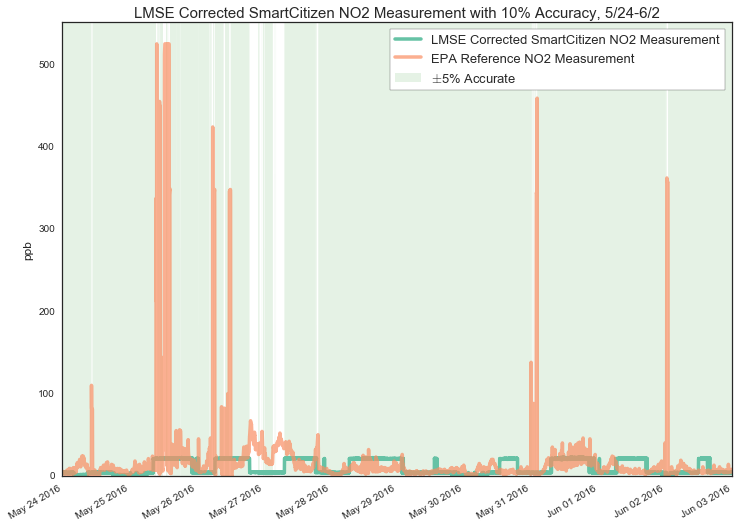

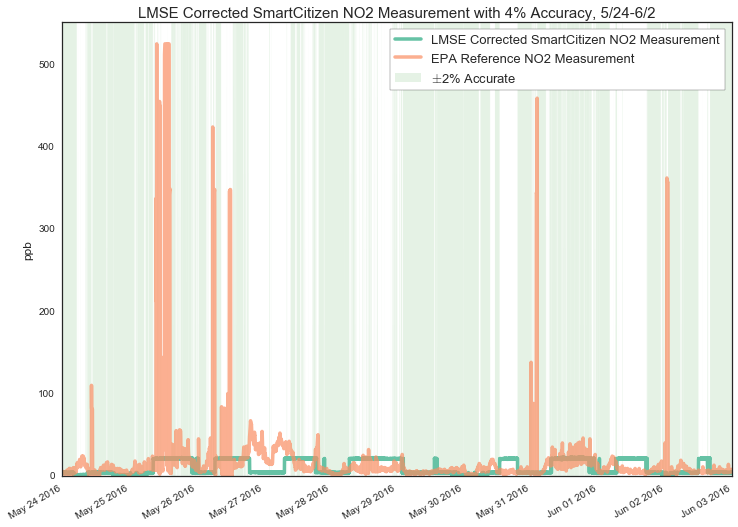

In [43]:
starttime = datetime.datetime(2016,5,24)
endtime = datetime.datetime(2016,6,3)

val1 = 'lmse_as_no2'
val2 = 'no2'
accurate_col = 'as_no2_compare_accurate_10_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', lw=0, alpha=0.1)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen NO2 Measurement','EPA Reference NO2 Measurement', '$\pm$5% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen NO2 Measurement with 10% Accuracy, 5/24-6/2', fontsize=15)
plt.savefig('./figs/as_no2_with_10_accuracy_zoomed.png', bbox_inches='tight', dpi=200)


val1 = 'lmse_as_no2'
val2 = 'no2'
accurate_col = 'as_no2_compare_accurate_4_percent'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  
fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val1].values, tz=localtz, ls='solid', marker=None, lw=3.5)
plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][val2].values, lw=3.5, alpha=0.7)

accurate_axis = df.ix[starttime: endtime][accurate_col]*df[ref_col].max()*2
ax.fill_between(df.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', lw=0, alpha=0.1)


plt.ylim(0,df[ref_col].max()*1.05)

plt.legend(['LMSE Corrected SmartCitizen NO2 Measurement','EPA Reference NO2 Measurement', '$\pm$2% Accurate'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=12)
plt.title('LMSE Corrected SmartCitizen NO2 Measurement with 4% Accuracy, 5/24-6/2', fontsize=15)
plt.savefig('./figs/as_no2_with_4_accuracy_zoomed.png', bbox_inches='tight', dpi=200)

In [44]:
#10 RESAVE

df.to_pickle('full_mlarray.pkl')

#added EPA no, EPA no2, lmse corrected sck and as NO2, and 4%/10% accuracy columns
#also re-calibrated O3+NO2 columns using lmse scaled NO2 values, because they were quite off (because of NO2 being off)


#for machine learning, using: 

'''
sck_no2_compare_accurate_10_percent
sck_no2_compare_accurate_4_percent
as_no2_compare_accurate_10_percent
as_no2_compare_accurate_4_percent
avg_15_as_no2_compare_accurate_10_percent
avg_15_as_no2_compare_accurate_4_percent
avg_360_as_no2_compare_accurate_10_percent
avg_360_as_no2_compare_accurate_4_percent
'''



'\nsck_no2_compare_accurate_10_percent\nsck_no2_compare_accurate_4_percent\nas_no2_compare_accurate_10_percent\nas_no2_compare_accurate_4_percent\navg_15_as_no2_compare_accurate_10_percent\navg_15_as_no2_compare_accurate_4_percent\navg_360_as_no2_compare_accurate_10_percent\navg_360_as_no2_compare_accurate_4_percent\n'